In [11]:
#Imports

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [12]:
#Loading the data
dataset = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Displaying the properites of the features comprising our data

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Displaying the statistical properties of the features

In [14]:
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Checking for null and nan values in the dataset

In [15]:
# get null values
null_values = dataset.isnull().sum()
print('Null:\n', null_values)
# get nan values
nan_values = np.isnan(dataset.values).sum()
print('Nan:', nan_values)


Null:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
Nan: 0


Checking to see if the data is balanced:

In [16]:
print("Bankrupt?")
print("No   : " , dataset['Bankrupt?'].value_counts()[0] , " -> ", round( 100*dataset['Bankrupt?'].value_counts()[0]/len(dataset) ),"%" )
print("Yes  : " , dataset['Bankrupt?'].value_counts()[1] , "  -> ", round( 100*dataset['Bankrupt?'].value_counts()[1]/len(dataset) ),"%" )


Bankrupt?
No   :  6599  ->  97 %
Yes  :  220   ->  3 %


The data is highly unbalanced. Negative class may be undersapled or the positive (minority) class may be oversampled with synthetic data using SMOTE. We choose to apply a combination of the two. We will first apply robust normalization to the data and then balance it by resampling.

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif 

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [18]:

def standardize(df):

    df_copy = df.copy()
    for column in df_copy.columns:
        
        if df_copy[column].max() == df_copy[column].min():
            df_copy[column] = df_copy[column]/df_copy[column].min()    
        else:
            df_copy[column] = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()  
        
    return df_copy

def robust_scaling(df):

    df_copy = df.copy()
    
    for column in df_copy.columns:
        if df_copy[column].max() == df_copy[column].min():
            df_copy[column] = df_copy[column]/df_copy[column].min()
        else:
            quantile_diff = (df_copy[column].quantile(0.75) - df_copy[column].quantile(0.25))
            if quantile_diff != 0:
                df_copy[column] = (df_copy[column] - df_copy[column].median())  / (df_copy[column].quantile(0.75) - df_copy[column].quantile(0.25))
            else:
                df_copy[column] = (df_copy[column] - df_copy[column].median())  / df_copy[column].std() 
            
    return df_copy

False
False
False
False


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


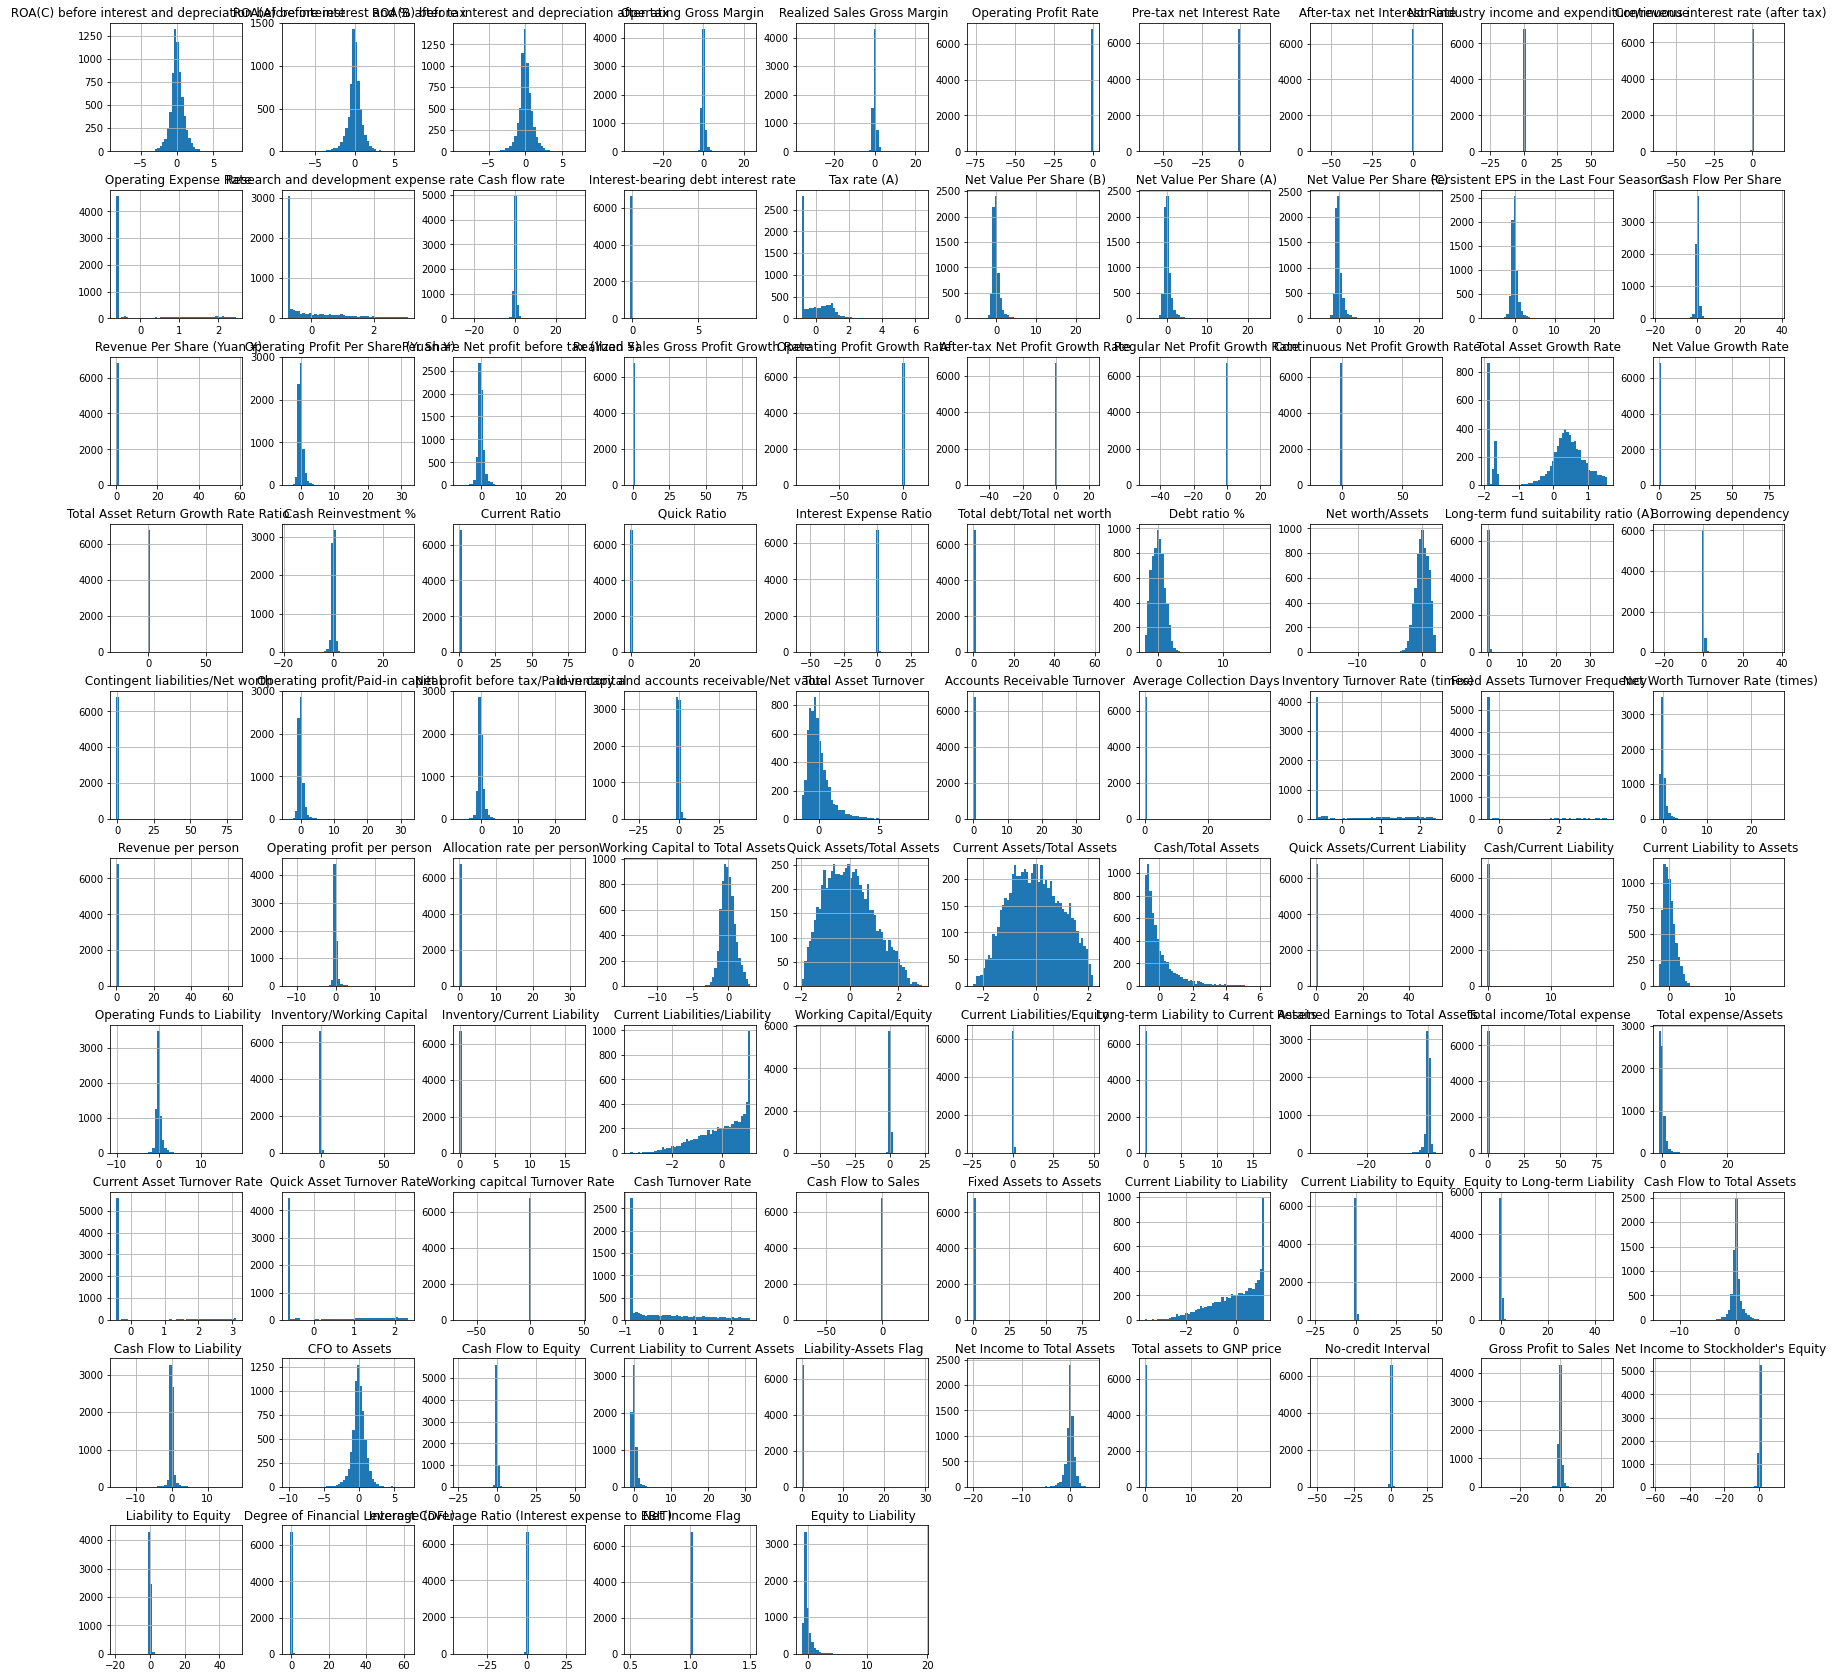

In [19]:
Y = dataset['Bankrupt?']
X = dataset.drop('Bankrupt?', axis=1)
#standardizing X
X = standardize(X)

print(np.any(np.isinf(X)))
print(np.any(np.isinf(Y)))
print(np.any(np.isnan(X)))
print(np.any(np.isnan(Y)))

#displaying the distributions of the standardized X features
X.hist(figsize = (30,30),bins = 50)
plt.show()

We use the "SMOTEEN" method combining over and under sampling to balance our data 

In [20]:
#Test Set will not be resampled
#X_cv and Y_cv will be used in cross validation for parameter selection
X_cv,X_test,Y_cv,Y_test  = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state = 42)

smote_enn = SMOTEENN(random_state=0)
X_resampled, Y_resampled = smote_enn.fit_resample(X_cv, Y_cv)

print("Bankrupt?")
print("No   : " , Y_resampled.value_counts()[0] , " -> ", round( 100*Y_resampled.value_counts()[0]/len(Y_resampled) ),"%" )
print("Yes  : " , Y_resampled.value_counts()[1] , "  -> ", round( 100*Y_resampled.value_counts()[1]/len(Y_resampled) ),"%" )


Bankrupt?
No   :  5215  ->  47 %
Yes  :  5936   ->  53 %


Observing the correlation matrix to get an idea of how many useful features we have

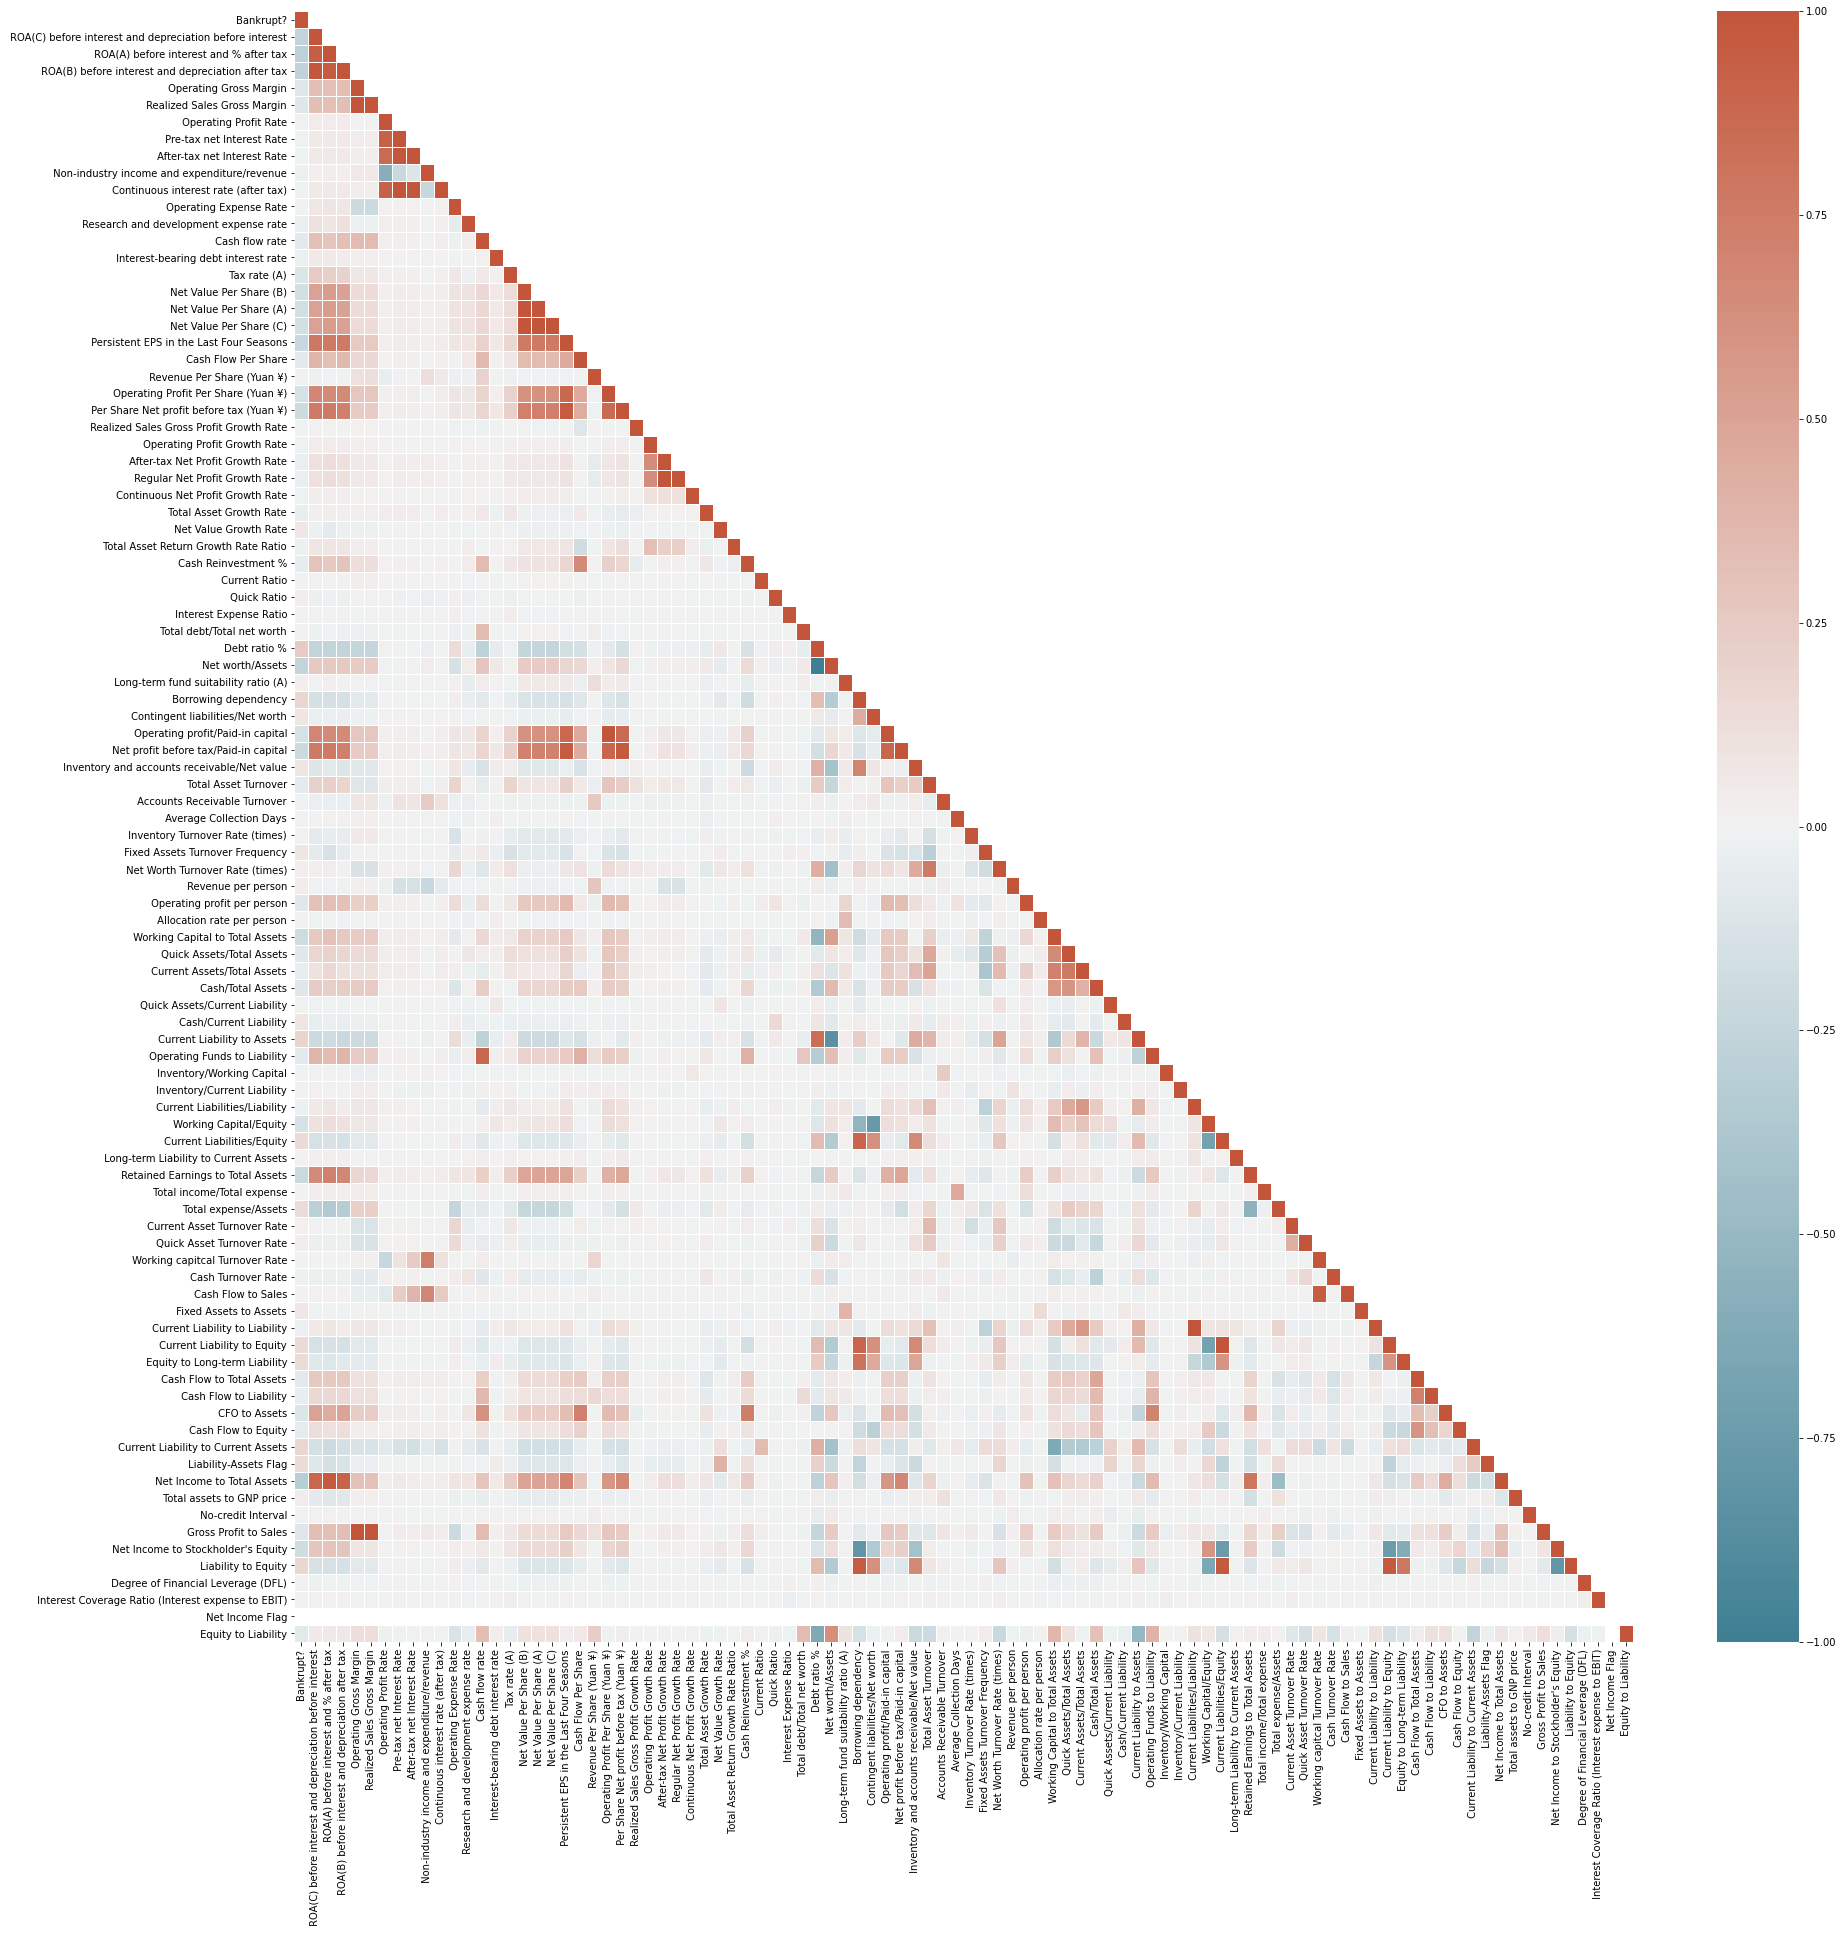

In [21]:
corr_mat = dataset.corr()
#lower trainglular part of the correlation matrix
lt_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))

fig, ax = plt.subplots(figsize=(30,30))   

cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(lt_mat, linewidths=0.5,cmap=cmap, ax=ax)
plt.show()

Now we search for the right combination of:

-number of features selected from the existing 94 feautres
    
-machine learning algorithm to apply:

    - Lasso Regression
    - SVM
    - Decision Tree

## Lasso and Ridge Regression

In [22]:
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [28]:
#number of features to keep
k_vals = [10,20,40, 50, 60, 80]

knn_list = []
svm_list = []
log_list = []

best_score = 0
best_params = ()

# for knn
knn_grid = { 'n_neighbors': [3, 5, 7, 9, 11],'metric':['euclidean','manhattan']  }

# for logistic regression
Log_param_grid = {"C":np.logspace(-4,4,9), "penalty":["l1","l2"]}

# for SVM
#SVM_param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear']}

SVM_param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# for Random Forest
    
k_list =[]

for k in k_vals:
    
        print("For k = ",k)
    
        best_k = SelectKBest(score_func=mutual_info_classif , k=k)
        fit = best_k.fit(X_resampled, Y_resampled)
        X_new=best_k.fit_transform(X_resampled, Y_resampled)
        
        print("   Logistic Regression:")
        # for logistic regression
        log_model = LogisticRegression()  
        search = GridSearchCV(log_model, Log_param_grid, scoring='accuracy', cv=sss, n_jobs=-1)
        results1 = search.fit(X_new, Y_resampled)
        print('Accuracy: %.3f' % results1.best_score_)
        print('Config: %s' % results1.best_params_)
        print("-----")
        
        if results1.best_score_ > best_score:
            best_score = results1.best_score_
            best_params = ("log",results1.best_params_ )
        
        log_list.append(results1)
        
        # for SVM
        print("   SVM:")
        svc = svm.SVC()
        search = GridSearchCV(svc, SVM_param_grid, scoring='accuracy', cv=sss, n_jobs=-1)
        results2 = search.fit(X_new, Y_resampled)
        print('Accuracy: %.3f' % results2.best_score_)
        print('Config: %s' % results2.best_params_)
        print("-----")
        
        svm_list.append(results2)
        
        if results2.best_score_ > best_score:
            best_score = results2.best_score_
            best_params = ("svm",results2.best_params_ )
        
        
        # for knn
        print("   KNN:")
        knn_model = KNeighborsClassifier(algorithm='brute')
        search = GridSearchCV(knn_model, knn_grid, scoring='accuracy', cv=sss, n_jobs=-1)
        results3 = search.fit(X_new, Y_resampled)
        print('Accuracy: %.3f' % results3.best_score_)
        print('Config: %s' % results3.best_params_)
        print("-----")
        
        knn_list.append(results3)
        
        if results3.best_score_ > best_score:
            best_score = results3.best_score_
            best_params = ("knn",results3.best_params_ )
        
        k_list.append(max(results1.best_score_,results2.best_score_,results3.best_score_))
        
        print("-----------------------------------------------")

print("Best score of ",max(k_list) ," using k=", k_vals[ k_list.index(max(k_list)) ] )
        
            

For k =  10
   Logistic Regression:


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.84916209        nan 0.85149357        nan 0.86306203
        nan 0.88332984        nan 0.88628884        nan 0.88655794
        nan 0.88709602        nan 0.88709602        nan 0.88709602]
  category=UserWarning


Accuracy: 0.887
Config: {'C': 100.0, 'penalty': 'l2'}
-----
   SVM:
Accuracy: 0.918
Config: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
-----
   KNN:
Accuracy: 0.967
Config: {'metric': 'manhattan', 'n_neighbors': 3}
-----
-----------------------------------------------
For k =  20
   Logistic Regression:


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.8523005         nan 0.85929513        nan 0.87965279
        nan 0.8978573         nan 0.90135434        nan 0.90350652
        nan 0.90359621        nan 0.90395495        nan 0.90386527]
  category=UserWarning
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.904
Config: {'C': 1000.0, 'penalty': 'l2'}
-----
   SVM:


KeyboardInterrupt: 

In [39]:
best_score = 0
best_params = ()

svm_list = []

SVM_param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'C': [10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [ 10, 100, 1000]}]

k_list =[]

print("SVM Grid Search")
        
# for SVM
svc = svm.SVC()
search = GridSearchCV(svc, SVM_param_grid, scoring='accuracy', cv=sss, n_jobs=-1)
results = search.fit(X_resampled, Y_resampled)
print('Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print("-----")
     

SVM Grid Search


KeyboardInterrupt: 

In [43]:
#PEROFRMANCE ON TEST SET

svm_model = svm.SVC(kernel='rbf',gamma=1e-3, C=2000)
svm_model.fit(X_resampled, Y_resampled)

X_new_test=best_k.fit_transform(X_test, Y_test)
print("SVM test score: ",svm_model.score(X_test,Y_test))

SVM test score:  0.9134897360703812


In [32]:
best_score = 0
best_params = ()

# for knn
knn_grid = { 'n_neighbors': [3, 5, 7, 9, 11],'metric':['euclidean','manhattan']  }

print("KNN Grid Search")

        # for knn
        knn_model = KNeighborsClassifier(algorithm='brute')
        search = GridSearchCV(knn_model, knn_grid, scoring='accuracy', cv=sss, n_jobs=-1)
        results = search.fit(X_new, Y_resampled)
        print('Accuracy: %.3f' % results.best_score_)
        print('Config: %s' % results.best_params_)
        print("-----")
        
        knn_list.append(results)
        
        if results.best_score_ > best_score:
            best_score = results.best_score_
            best_params = ("knn",results.best_params_ )
            
        k_list.append(results.best_score_)
        
print("Best score of ",max(k_list) ," using k=", k_vals[ k_list.index(max(k_list)) ], " and params: ", knn_list[ k_list.index(max(k_list)) ].best_params_)
 
        
            

KNN Grid Search
For k =  10
Accuracy: 0.967
Config: {'metric': 'manhattan', 'n_neighbors': 3}
-----
For k =  20
Accuracy: 0.972
Config: {'metric': 'manhattan', 'n_neighbors': 3}
-----
For k =  40
Accuracy: 0.975
Config: {'metric': 'euclidean', 'n_neighbors': 3}
-----
For k =  50
Accuracy: 0.979
Config: {'metric': 'manhattan', 'n_neighbors': 3}
-----
For k =  60
Accuracy: 0.980
Config: {'metric': 'euclidean', 'n_neighbors': 3}
-----
For k =  80
Accuracy: 0.991
Config: {'metric': 'euclidean', 'n_neighbors': 3}
-----
Best score of  0.9909425482349205  using k= 80  and params:  {'metric': 'euclidean', 'n_neighbors': 3}


In [35]:
#PEROFRMANCE ON TEST SET

knn_model = KNeighborsClassifier(algorithm='brute', n_neighbors=3, metric='euclidean' )
knn_model.fit(X_resampled, Y_resampled)

print("KNN test score: ",knn_model.score(X_test,Y_test))


KNN test score:  0.8768328445747801


In [ ]:
X_raw,X_test,y_raw,y_test  = train_test_split(dataset, labels, test_size=0.1, stratify = Y, random_state = 42)